<a href="https://colab.research.google.com/github/M-Sravanthi/PyTorchTutorial/blob/main/02_nn_Classification_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 02. Neural network classification with Pytorch

Classification is a problem of predicting whether something is one thing or another and there can be multiple things as options

Book version of this notebook - https://www.learnpytorch.io/02_pytorch_classification/
All other resources - https://github.com/mrdbourke/pytorch-deep-learning
Stuck ? Ask a question under the discussions tab in the github page mentioned above.

## 1. Make classification data and get it ready


In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

#make 1000 samples
n_samples = 1000

#Create circles
X,y = make_circles(n_samples, noise = 0.03, random_state= 42)

In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
print(X[:5])
print(y[:5])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0]


In [5]:
#Make dataframe of circle data

#We are trying to visualize the data here
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


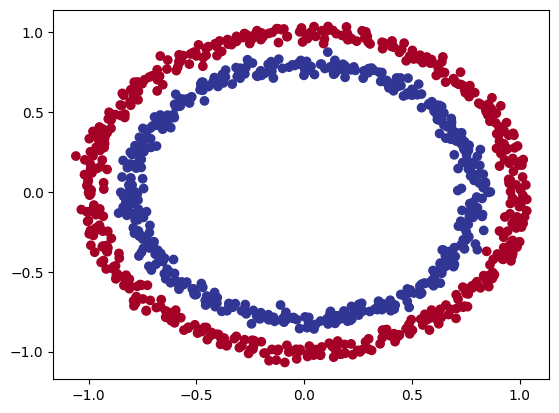

In [6]:
# Visualize, visualize, visualize

import matplotlib.pyplot as plt
plt.scatter(x = X[:,0],
            y = X[:,1],
            c = y,
            cmap = plt.cm.RdYlBu)

Note: The data we are working with is often referred to as toy dataset - small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [7]:
X.shape, y.shape #X has two features and 1000 samples and y has 1000 samples
#2 samples of X have one corresponding label of y

((1000, 2), (1000,))

In [8]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [9]:
#View the first eg of features and lables
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and its y label: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and its y label: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [10]:
import torch
torch.__version__

'2.8.0+cu126'

In [11]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [12]:
#Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

#this might give error if you run it more than once as once it converts into tensor it can no longer do the conversion from numpy since it already converted it tinto tensor

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [14]:
# Split data into training and test sets
#Random split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)



In [15]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### 1.3 Build a model

Lets build a model to classify the blue and red dots

To do so,
1. Set up device agnostic code so our code will run on a accelerator (GPU)
2. Construct a model by subclassing `nn.Model`
3. Define a loss function and optimizer
4. Create a training and test loop


In [16]:
# Import PyTorch and nn

import torch
from torch import nn

#Make device agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

1.3.2 Lets create a model now:

1. Subclass `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation)
4. Instantiate an instance of our model class and send it to the target device

In [17]:
# 1. Construct a model that subclasses nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. Create 2 nn.Linear capable of handling the shapes of data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) #takes in two features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) #takes in 5 features from previous layer and outputs a single feature (same shape as y)
  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
device

'cpu'

In [19]:
next(model_0.parameters(),device)

Parameter containing:
tensor([[ 0.5925, -0.0689],
        [ 0.4834, -0.4689],
        [-0.6817, -0.1466],
        [-0.3340, -0.3301],
        [ 0.1451, -0.4231]], requires_grad=True)

In [20]:

# Lets replicate the above model using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features = 5, out_features=1)
).to(device)

# the nn.sequential is same as the model constructed in the previous step using
# subclass method
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
#Make predictions
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4879,  0.4739],
                      [-0.3659,  0.3984],
                      [ 0.5570, -0.5187],
                      [-0.0796,  0.6584],
                      [ 0.1120, -0.2782]])),
             ('0.bias', tensor([-0.6691,  0.3693,  0.3013,  0.5839,  0.4734])),
             ('1.weight',
              tensor([[-0.4075, -0.0730,  0.4377, -0.1061,  0.2004]])),
             ('1.bias', tensor([0.2584]))])

In [22]:
# Make predictions

untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape:{X_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")


Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape:torch.Size([200, 2])

First 10 predictions: 
tensor([[ 0.0888],
        [ 0.1247],
        [ 0.4983],
        [-0.0293],
        [ 1.2977],
        [ 1.3135],
        [ 0.7810],
        [ 1.0614],
        [ 0.4639],
        [ 0.1360]], grad_fn=<SliceBackward0>)

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss fn and optimizer to use ?
This obvio problem specific

So for example for regression - MAE or MSE
For binary classification - binary cross entropy or
categorical cross entropy (cross entropy).

As a reminder, the loss fn measures how wrong the model's
predictions are.

And for optimizers - SGD and Adam are the most common. But Pytorch
has many more options.  

* For the loss function we're goint to use `torch.nn.BCEWithLogitsLoss()` for more on Binary cross entropy (BCE) = https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a/
For a definition on what is a logit in DL - book version has all the links

In [23]:
# Set up the loss function
# loss_fn = nn.BCELoss() #BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() #BCEWithLogistsLoss = sigmoid activation function built in

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [24]:
# Calculate accuracy - out of 100 examples what % does our model get right ?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

### 3. Train model

To train our model, we are going to build the training
Loop acc. to following steps

1. Forward pass
2. Calculate the loss
3. Optmizer zero grad
4. Loss backward propagation
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**

We can convert these **logits** into **prediction probabilities** by passing them to
some kind of activation function (e.g sigmoid for binary classification
and softmax for multiclass classificaiton)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the max.

In [25]:
# VIew the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.0888],
        [ 0.1247],
        [ 0.4983],
        [-0.0293],
        [ 1.2977]])

In [26]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [27]:
# Use the sigmoid activation function on our model logits to turn them into prediciton probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5222],
        [0.5311],
        [0.6220],
        [0.4927],
        [0.7855]])

For our prediciton probability values, we need to perform a range-style rounded on them:
* `y_pred_probs` >= 0.5, y=1 (class 1)
* `y_pred_probs` < 0.5, y=0 (class 0)

In [28]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

#In full (logits -> pred probs -> pred labels = all in one step)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#Get rid of extra dimensions
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 0., 1.])

In [29]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [30]:
###3.2 Building the training and the test loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

#Put the data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test= X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  #1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # raw logits-> pred probs -> pred labels

  #2. Calculate loss/accuracy

  #loss = loss_fn(torch.sigmoid(y_logits), y_train) #use this if you are using BCELoss as loss function
  #nn BCELoss() expects sigmoid function as input

  loss = loss_fn(y_logits, #nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true= y_train, y_pred = y_pred)

  #3. Optimizer grad
  optimizer.zero_grad()

  #4. Back propagation of loss
  loss.backward()

  #5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate the loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)
  # Print
  if epoch % 10 == 0:
    print(f"Epoch: {epoch}  | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

Epoch: 0  | Loss: 0.77829, Acc: 57.88% | Test loss: 0.75302 | Test acc: 59.50%
Epoch: 10  | Loss: 0.72832, Acc: 52.38% | Test loss: 0.71423 | Test acc: 57.50%
Epoch: 20  | Loss: 0.71090, Acc: 51.00% | Test loss: 0.70162 | Test acc: 53.00%
Epoch: 30  | Loss: 0.70365, Acc: 51.50% | Test loss: 0.69687 | Test acc: 50.00%
Epoch: 40  | Loss: 0.70002, Acc: 50.88% | Test loss: 0.69478 | Test acc: 48.50%
Epoch: 50  | Loss: 0.69790, Acc: 51.25% | Test loss: 0.69374 | Test acc: 48.00%
Epoch: 60  | Loss: 0.69653, Acc: 50.50% | Test loss: 0.69317 | Test acc: 49.00%
Epoch: 70  | Loss: 0.69558, Acc: 49.88% | Test loss: 0.69286 | Test acc: 50.00%
Epoch: 80  | Loss: 0.69491, Acc: 50.12% | Test loss: 0.69271 | Test acc: 50.00%
Epoch: 90  | Loss: 0.69443, Acc: 49.88% | Test loss: 0.69265 | Test acc: 49.50%


###4. Make some predictions - from the above output we can say that our model is only as good as guessing

So to inspect it, let's make some predictions and visualize them

To do so, we're going to import a function called `plot_decision_boundary()` - this is part of the helper functions from the github version of this course - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py



In [31]:
import requests
from pathlib import Path

#Download helper functions from Learn PyTorch repo (if its not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Download helper_functions.py


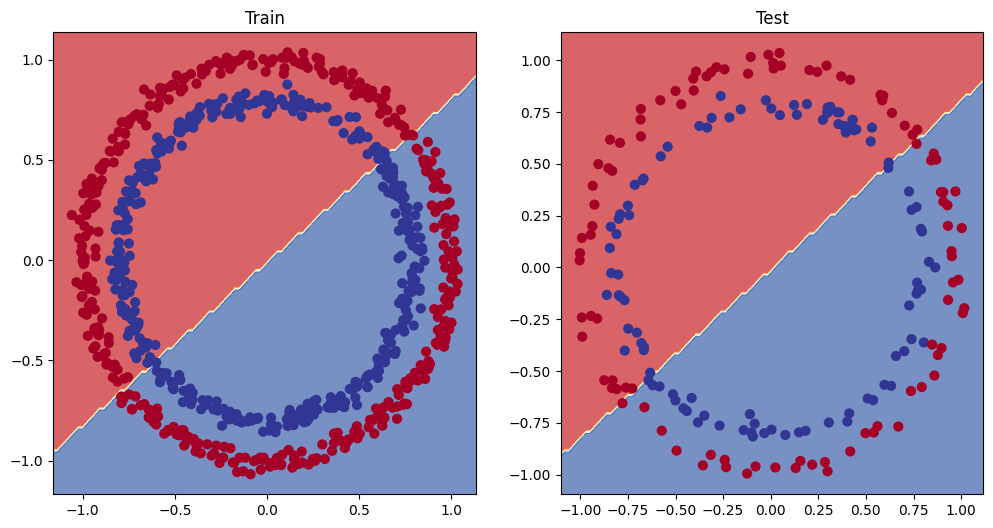

In [32]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### 5. Improving our model - (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data (more nn.Linear layers)
* Add more hidden units - go from 5 hidden units to 10 hidden units (more output features )
* Fit for longer - more epochs
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective coz they deal directly with the model, rather than the data.

And coz these options are all values that data scientists can change, they are called as **hyperparameters**

Let's try an improve our model by:
* Adding more hidden units 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [33]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features =2, out_features=10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    #z = self.layer_1(x)
    #z = self.layer_2(z)
    #z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) #this way of writing operations leverages speed ups BTS

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [34]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()
# Create an optimizer
optimizer = torch.optim.Adam(model_1.parameters(),
                             lr = 0.1)

In [35]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)
  # 3. OPtimizer zero grad
  optimizer.zero_grad()

  # 4. Back propogation
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()

  #1. Forward pass
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    #2. Calculate loss/accuracy
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true = y_test,
                          y_pred = test_pred)

  #Print
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | loss: {loss:.5f} | Acc: {acc:.2f}% | test loss: {test_loss:.5f} | test_acc: {test_acc:.2f}%")

Epoch: 0 | loss: 0.69396 | Acc: 50.88% | test loss: 0.79303 | test_acc: 50.00%
Epoch: 100 | loss: 0.69298 | Acc: 51.50% | test loss: 0.69470 | test_acc: 45.50%
Epoch: 200 | loss: 0.69317 | Acc: 48.75% | test loss: 0.69505 | test_acc: 47.00%
Epoch: 300 | loss: 0.69298 | Acc: 51.12% | test loss: 0.69468 | test_acc: 46.00%
Epoch: 400 | loss: 0.69298 | Acc: 51.00% | test loss: 0.69468 | test_acc: 46.00%
Epoch: 500 | loss: 0.69298 | Acc: 51.00% | test loss: 0.69468 | test_acc: 46.00%
Epoch: 600 | loss: 0.69298 | Acc: 51.00% | test loss: 0.69468 | test_acc: 46.00%
Epoch: 700 | loss: 0.69298 | Acc: 51.00% | test loss: 0.69468 | test_acc: 46.00%
Epoch: 800 | loss: 0.69298 | Acc: 51.00% | test loss: 0.69468 | test_acc: 46.00%
Epoch: 900 | loss: 0.69298 | Acc: 51.00% | test loss: 0.69468 | test_acc: 46.00%


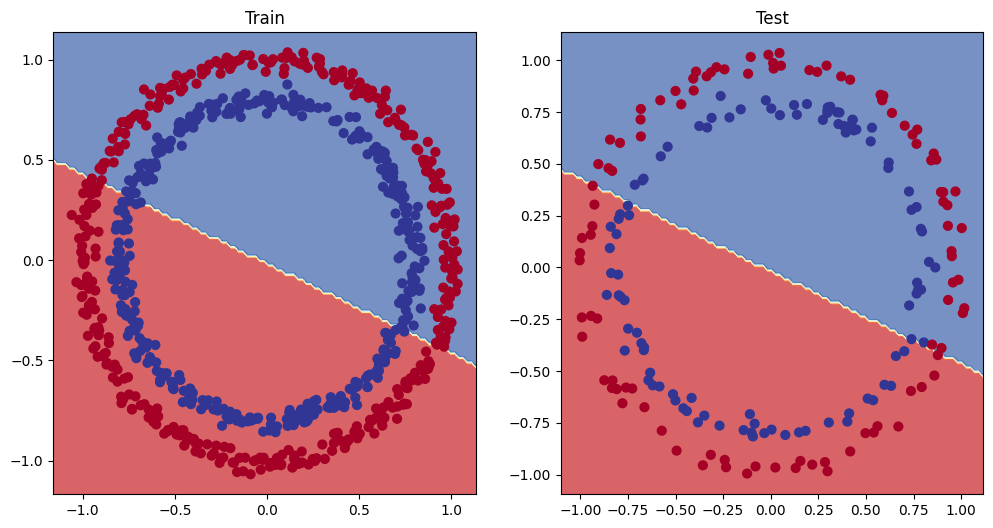

In [36]:
# Plot decision boundary of the model 1
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test a smaller problem
Fit the above model to a smaller problem the one that we know works - so we will apply the above problem to `01_Pytorch_workflow problem` the **Linear regression** one.

In [37]:
#Create some data same as notebook 01

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

#Create data
X_regress = torch.arange(start,end,step).unsqueeze(dim=1)
y_regress = weight*X_regress + bias

#Check the data
len(X_regress), len(y_regress)


(100, 100)

In [38]:
#Create train and test splits
train_split = int(len(X_regress)*0.8)
X_train_regress, y_train_regress = X_regress[:train_split], y_regress[:train_split]
X_test_regress, y_test_regress = X_regress[train_split:],y_regress[train_split:]

len(X_train_regress), len(X_test_regress),len(y_train_regress), len(y_test_regress)


(80, 20, 80, 20)

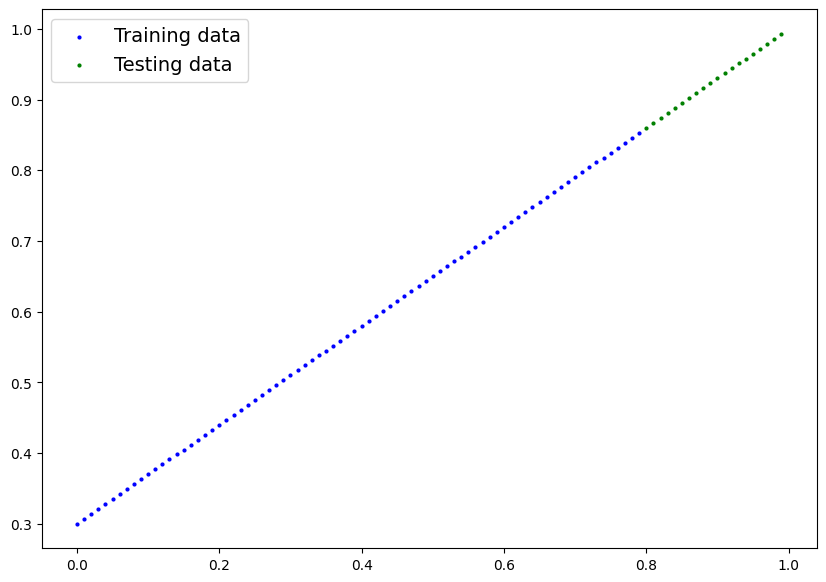

In [39]:
#Plot our data
plot_predictions(train_data = X_train_regress,
                 train_labels = y_train_regress,
                 test_data = X_test_regress,
                 test_labels = y_test_regress)

### 5.2 Adjust `Model_1` to fit a straight line


In [40]:
# Same architecture as model (but using nn.Sequential())
#The only difference will be - in_features = 1 coz X_train regress has only 1 values not 2 unlike in the Circle case

model_2 = nn.Sequential(
    nn.Linear(in_features =1, out_features=10),
    nn.Linear(in_features=10,out_features = 10),
    nn.Linear(in_features = 10, out_features = 1)
).to(device)

model_2



Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [41]:
#Define loss function
loss_fn = nn.L1Loss()

#Optimizer
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr = 0.01)

In [42]:
#Train the model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

#Target device
X_train_regress = X_train_regress.to(device)
y_train_regress = y_train_regress.to(device)
X_test_regress = X_test_regress.to(device)
y_test_regress = y_test_regress.to(device)


for epoch in range(epochs):
  #Training
  model_2.train()
  y_pred = model_2(X_train_regress)
  loss = loss_fn(y_pred, y_train_regress)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regress)
    test_loss = loss_fn(test_pred,y_test_regress)

  #print
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | test loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986 | test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | test loss: 0.00360


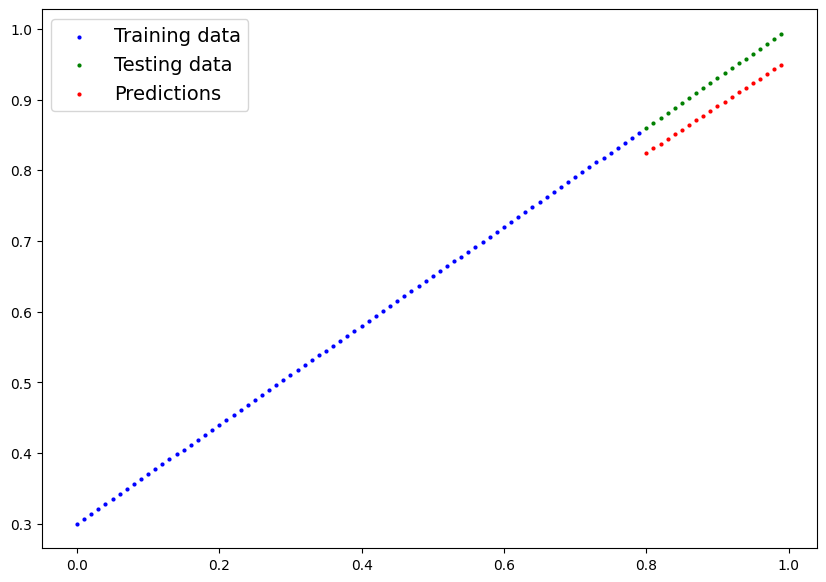

In [43]:
model_2.eval()
with torch.inference_mode():
  y_pred = model_2(X_test_regress)

plot_predictions(train_data = X_train_regress.cpu(),
                 train_labels = y_train_regress.cpu(),
                 test_data = X_test_regress.cpu(),
                 test_labels = y_test_regress.cpu(),
                 predictions = y_pred.cpu())

### 6. The missing piece: non-linearity

"What patterns could you draw if you were given an inifinite amount of a straight and non-straight lines ?"

Or in machine learning terms, an infinite linear and no-linear functions




### 6.1 Recreating non-linear data (red and blue circles)


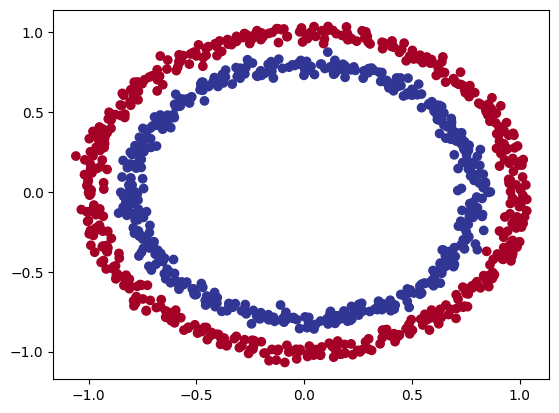

In [44]:
# Make and plot data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples, noise = 0.03, random_state = 42)

plt.scatter(X[:,0],X[:,1], c = y, cmap = plt.cm.RdYlBu)

In [45]:
# Convert data to tensors
import torch
from sklearn.model_selection import train_test_split

#Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train,X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 42
)

X_train [:5], y_train [:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity



In [46]:
# Build a model with non-linear activation function
device = 'cuda' if torch.cuda.is_available() else 'cpu'
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features=10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()

  def forward(self,x):
    #Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [47]:
#Set up loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr =0.1)


In [48]:
### 6.3 Training a model with non-linearity

torch.manual_seed(42)
#torch.cude.manual_seed(42)

epochs = 1000

#Put the features on device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

#Loop through data
for epoch in range(epochs):
  #training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Loss calcucate
  loss= loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)
  #3. Optmizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. optimizer Step
  optimizer.step()

  ###Testing
  model_3.eval()
  #1. Forward pass
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

  #2. Caculate loss/acc
  test_loss = loss_fn(test_logits,y_test)
  test_acc = accuracy_fn(y_true = y_test,
                         y_pred = test_pred)

  #Print
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Loss acc: {acc:.2f}% | Test loss: {test_loss:.5f} | test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.69295 | Loss acc: 50.00% | Test loss: 0.69319 | test acc: 50.00
Epoch: 100 | Loss: 0.69115 | Loss acc: 52.88% | Test loss: 0.69102 | test acc: 52.50
Epoch: 200 | Loss: 0.68977 | Loss acc: 53.37% | Test loss: 0.68940 | test acc: 55.00
Epoch: 300 | Loss: 0.68795 | Loss acc: 53.00% | Test loss: 0.68723 | test acc: 56.00
Epoch: 400 | Loss: 0.68517 | Loss acc: 52.75% | Test loss: 0.68411 | test acc: 56.50
Epoch: 500 | Loss: 0.68102 | Loss acc: 52.75% | Test loss: 0.67941 | test acc: 56.50
Epoch: 600 | Loss: 0.67515 | Loss acc: 54.50% | Test loss: 0.67285 | test acc: 56.00
Epoch: 700 | Loss: 0.66659 | Loss acc: 58.38% | Test loss: 0.66322 | test acc: 59.00
Epoch: 800 | Loss: 0.65160 | Loss acc: 64.00% | Test loss: 0.64757 | test acc: 67.50
Epoch: 900 | Loss: 0.62362 | Loss acc: 74.00% | Test loss: 0.62145 | test acc: 79.00


In [49]:
model_3.eval()
with torch.inference_mode():
  y_pred = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_pred[:5], y_test[:5]

(tensor([1., 0., 1., 0., 0.]), tensor([1., 0., 1., 0., 1.]))

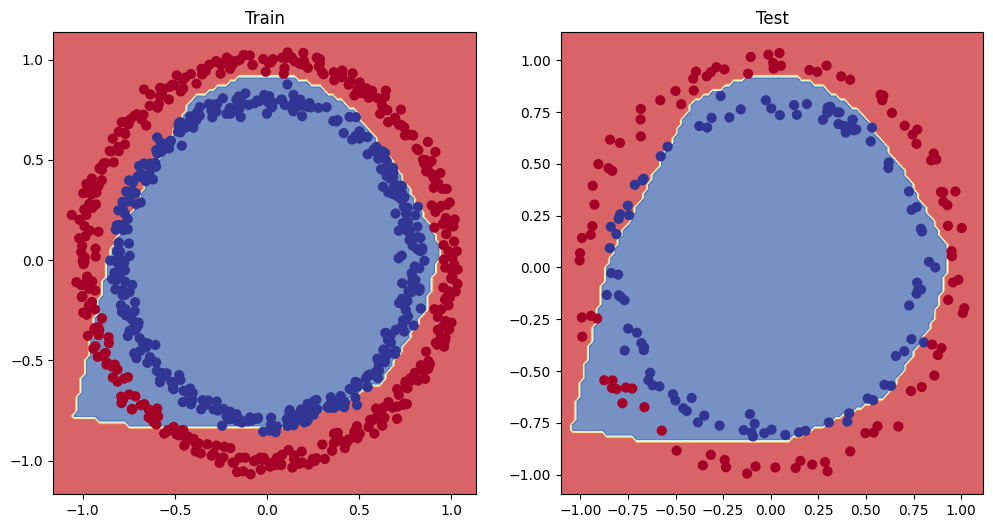

In [50]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation functions
Neural networks, rather than telling the model what to learn, we give it the tools to discover the patterns in data and it tries to figure out the best patterns on its own.

And these tools are linear and non-linear finctions

In [51]:
# Create a tensor

A = torch.arange(-10,10,1, dtype = torch.float32)
A.dtype

torch.float32

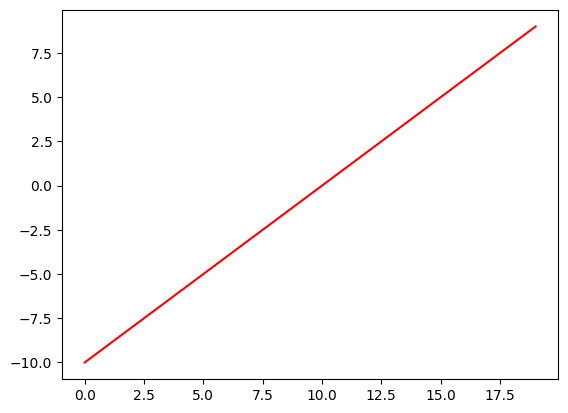

In [52]:
#Visualize the tensor

plt.plot(A,c='red')

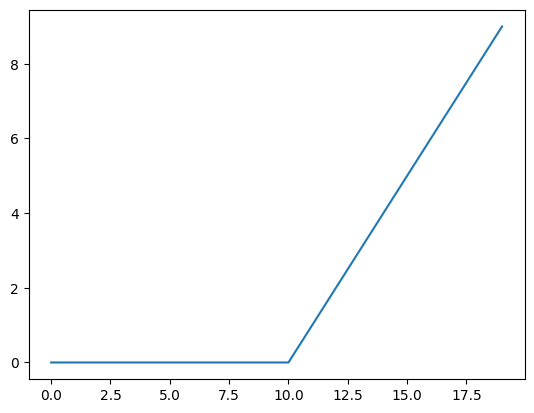

In [53]:
plt.plot(torch.relu(A))

In [54]:
def relu(x:torch.Tensor)-> torch.Tensor:
  return torch.maximum(torch.tensor(0),x) #inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

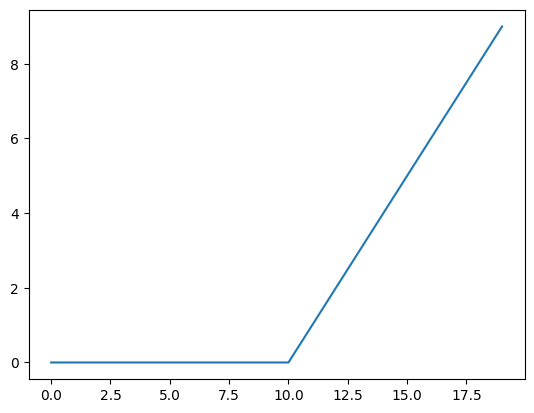

In [55]:
# Plot ReLU activation function
plt.plot(relu(A))

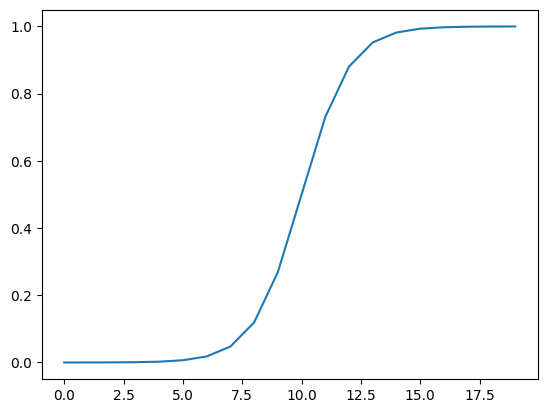

In [56]:
#Now lets do the same for sigmoid
def sigmoid(x):
  return (1/(1+torch.exp(-x)))

plt.plot(sigmoid(A))

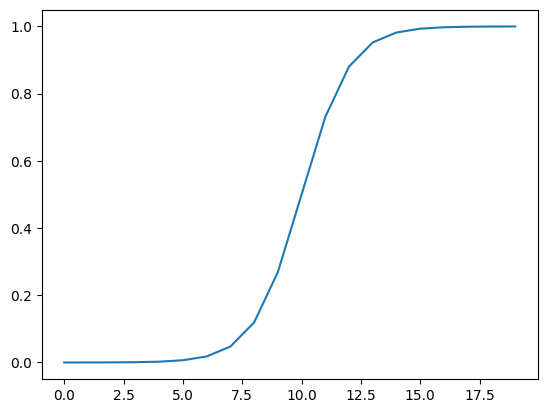

In [57]:
plt.plot(torch.sigmoid(A))

## 8. Putting it all together with a multiclass classification problem

* Binary classification = one thing or another (cat vs. dog ; spam vs not spam)
* Multiclass classification = more than one thing or another ( pizza or bun or drinks)

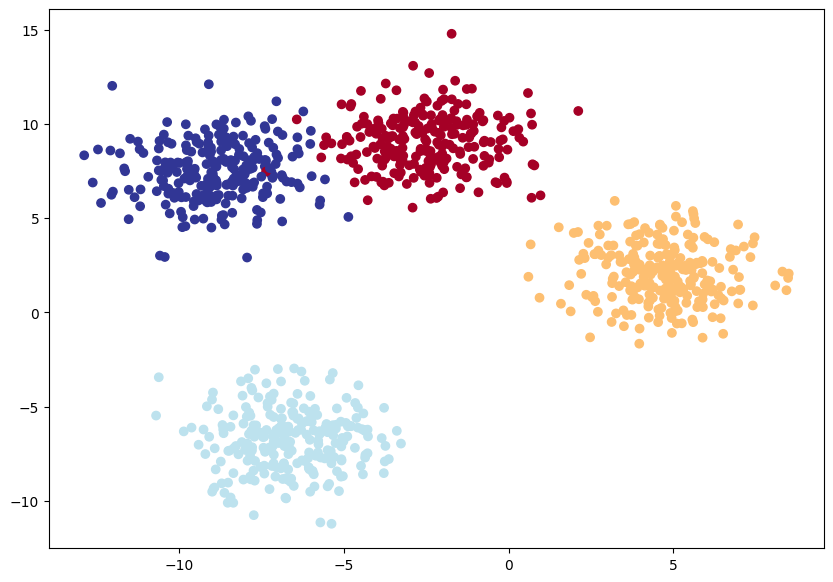

In [58]:
## 8.1 Creating a toy multi-class dataset

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs
from sklearn.model_selection import train_test_split

#Set the hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std=1.5,
                            random_state = RANDOM_SEED)

# 2. Turn the data in to tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train,  y_blob_test = train_test_split(X_blob,
                                                                         y_blob,
                                                                         test_size = 0.2,
                                                                         random_state = RANDOM_SEED)

# 4. Plot the data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)





### 8.2 Building a multiclass classification model in Pytorch

In [59]:
# Create device agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

Google python style guide - check it out

In [70]:
# Build a multiclass classification model

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multiclass classification

    Args:
      input_features (int): No. of input features to the model
      output_features (int): No. of output features (output classes)
      hidden_units (int): Number of hidden units betwen layers, default 8

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features,out_features = hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

#Create an instance of the model
model_4 = BlobModel(
    input_features=2,
    output_features= 4,
    hidden_units = 8
).to(device)

model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [71]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [72]:
### Set up a loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr = 0.1)

### 8.4 Getting prediction probabilities for multiclass classification

In order to evaluate and train and etst our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels

logits -> Pred probs (use `torch.softmax`) -> Pred labels (use `argmax` of pred probs)

In [73]:
model_4.eval()
with torch.inference_mode():
  y_blob_logits = model_4(X_blob_test.to(device))
y_blob_logits[:5] # the output has four features each is because
# coz it outputs four probabilities - for each coloured dot (red green yellow or blue)
# each of these needs to be converted to the most decisive one

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]])

In [74]:
# Convert logits to pred probabilities
y_blob_pred_probs = torch.softmax(y_blob_logits,dim=1)
y_blob_pred_probs[:5]

tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]])

In [75]:
torch.sum(y_blob_pred_probs[0]) # sum of all probabilities is 1

tensor(1.)

In [76]:
# Convert the prediction probabilities to prediction labels
y_blob_pred_label= torch.argmax(y_blob_pred_probs, dim= 1)
y_blob_pred_label[:10]

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3])

### 8.5 Building a training loop and testing loop for multiclass pytorch model



In [77]:
torch.manual_seed(42)
#torch.cuda.manual_seed(42)

# Put the variable on the target device
X_blob_train, y_blob_train = X_blob_train.to(device),y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device),y_blob_test.to(device)

epochs = 100

# Training loop

for epoch in range(epochs):
  #Train the model
  model_4.train()

  #1. Forward pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim = 1)

  #2. Calculate loss
  loss = loss_fn(y_logits, y_blob_train)
  acc =  accuracy_fn(y_true = y_blob_train,
                     y_pred = y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  #Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)

  test_loss = loss_fn(test_logits, y_blob_test)
  test_acc = accuracy_fn(y_true = y_blob_test,
                         y_pred = test_pred)

  #Print
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.2f} | Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.04 | Acc: 65.50% | Test Loss: 0.58 | Test Acc: 95.50%
Epoch: 10 | Loss: 0.14 | Acc: 99.12% | Test Loss: 0.13 | Test Acc: 99.00%
Epoch: 20 | Loss: 0.08 | Acc: 99.12% | Test Loss: 0.07 | Test Acc: 99.50%
Epoch: 30 | Loss: 0.06 | Acc: 99.12% | Test Loss: 0.05 | Test Acc: 99.50%
Epoch: 40 | Loss: 0.05 | Acc: 99.00% | Test Loss: 0.04 | Test Acc: 99.50%
Epoch: 50 | Loss: 0.04 | Acc: 99.00% | Test Loss: 0.03 | Test Acc: 99.50%
Epoch: 60 | Loss: 0.04 | Acc: 99.00% | Test Loss: 0.03 | Test Acc: 99.50%
Epoch: 70 | Loss: 0.04 | Acc: 99.00% | Test Loss: 0.03 | Test Acc: 99.50%
Epoch: 80 | Loss: 0.03 | Acc: 99.00% | Test Loss: 0.03 | Test Acc: 99.50%
Epoch: 90 | Loss: 0.03 | Acc: 99.12% | Test Loss: 0.02 | Test Acc: 99.50%


In [78]:
# Evaluate predictions of multiclass classification
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
  y_pred = torch.softmax(y_logits, dim =1).argmax(dim=1)

y_pred[:10]==y_blob_test[:10]


tensor([True, True, True, True, True, True, True, True, True, True])

##

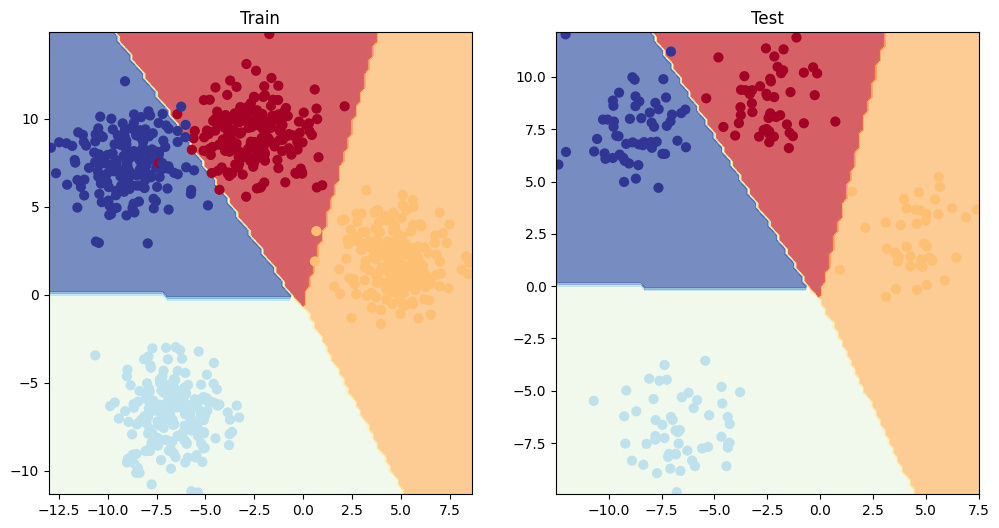

In [79]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

## 9. A few more classificaiton metrics (To evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right ?
* Precision
* Recall
* F1 - score
* Confusion matrix
* Classification report

Very nice reference article - https://medium.com/data-science/beyond-accuracy-precision-and-recall-3da06bea9f6c


In [81]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 29.8 MB/s eta 0:00:00


In [87]:
from torchmetrics import Accuracy

#Set up metric
torchmetric_acc = Accuracy(task = "multiclass",num_classes= 4).to(device)

#Calculate accuracy
torchmetric_acc(y_pred, y_blob_test)

tensor(0.9950)